In [ ]:
#  Determine how accurate the predictions made by the models are 


#  model evaluation
#  over fitting, under fitting, and model selection
#  ridge regression
#  grid search

In [1]:
import pandas as pd
import numpy as np

# Import clean data 
file = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(file)

In [2]:
df.to_csv("module_5_auto.csv")

In [3]:
df.head()


,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
#  get only numeric data

df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
#  import libraries for plotting

In [5]:
%%capture
! pip install ipywidgets

In [6]:
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [ ]:
#  Functions for Plotting 

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel("Price in $")
    plt.ylabel("Proportion of Cars")
    
    plt.show()
    plt.close()

In [48]:
def PollyPlot(xTrain, xTest, yTrain, yTest, lr, polyTransform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #  trainging data
    #  testing data
    #  lr: linear regression object
    #  polyTransform: polynomial transformation object
    
    
    xMax = max([xTrain.values.max(), xTest.values.max()])
    xMin = min([xTrain.values.min(), xTest.values.min()])
    
    x = np.arange(xMin, xMax, 0.1)
    
    
    plt.plot(xTrain, yTrain, "ro", label="Training Data")
    plt.plot(xTest, yTest, "go", label="Test Data")
    plt.plot(x, lr.predict(polyTransform.fit_transform(x.reshape(-1, 1))), label="Predicted Function")
    
    plt.ylim([-10000, 60000])
    plt.ylabel("Price")
    plt.legend()

In [9]:
#  Training and Testing

#  split your data into trainging and testing data
#  place the target data price in a different dataframe y


y_data = df["price"]

x_data = df.drop("price", axis=1)

In [10]:
#  split the data into training and testing data randomly

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)



print("Number of testing samples: ", x_test.shape[0])
print("Number of training samples: ", x_train.shape[0])

Number of testing samples:  31
Number of training samples:  170


In [ ]:
#  test_size = sets the proportion of data that is split into the testing set
#  testing set is set to 15% of the total data set

In [11]:
#  split the data set such that 40% of the data samples will be used for testing 
#  random state = 0



x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)


print("Number of testing samples: ", x_test1.shape[0])
print("Number of training samples: ", x_train1.shape[0])

Number of testing samples:  81
Number of training samples:  120


In [12]:
#  import LinearRegression from the module linear_model

from sklearn.linear_model import LinearRegression

In [13]:
#  create a linear regression object 

lre = LinearRegression()

In [15]:
#  fit the model using "horsepower"

lre.fit(x_train[["horsepower"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#  Calculate the R-squared 

In [16]:
lre.score(x_train[["horsepower"]], y_train)

0.6449517437659684

In [18]:
lre.score(x_test[["horsepower"]], y_test)

0.707688374146705

In [19]:
#  find the R-squared on the test data using 90% of the data for training data

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)


print("Number of testing samples: ", x_test1.shape[0])
print("Number of training samples: ", x_train1.shape[0])


lre.fit(x_train1[["horsepower"]], y_train1)
lre.score(x_test1[["horsepower"]], y_test1)




Number of testing samples:  21
Number of training samples:  180


0.7340722810055448

In [ ]:
#  cross-validation 

#  for when you don't have sufficient testing data

In [20]:
from sklearn.model_selection import cross_val_score

In [22]:
#  cross_val_score

#  input:
#    object
#    feature = horsepower
#    target data = y_data
#    cv = determines the number of folds 


Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=4)

In [23]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [24]:
#  calculate the average and standard deviation

print("The mean of the folds are: ", Rcross.mean())
print("Standard  deviation is: ", Rcross.std())

The mean of the folds are:  0.522009915042119
Standard  deviation is:  0.2911839444756029


In [25]:
#  can use negative squared error as a score

-1 * cross_val_score(lre, x_data[["horsepower"]], y_data, cv=4, scoring="neg_mean_squared_error")

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [26]:
#  calculate the average R-squared using 2 folds
#  find the average R-squared for the second fold utilizing the horsepower as a feature 

Rc = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=2)

Rc[1]

0.443196127755029

In [ ]:
#  cross_val_predict predicts the output

#  function splits up the data into the specified number of folds
#     uses 1 fold to get a prediction
#     rest of the folds are used as test data 

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
#  input:
#    object
#    feature = horsepower
#    target data = y_data
#    cv = number of folds 


yhat = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [ ]:
#  Over fitting, Under fitting, and Model selection

#  test data, or output of sample data, is a much better measure of how well your model performs in real world
#   - this is due to over fitting 

In [29]:
#  create a multiple linear regression object and train the model using:
#  * horsepower
#  * curb-weight
#  * engine-size
#  * highway-mpg


lr = LinearRegression()
lr.fit(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#  Prediction using training data 

yhat_train = lr.predict(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [32]:
#  Prediction using test data 

yhat_test = lr.predict(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [ ]:
#  perform model evaluation using the training and test data separately

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

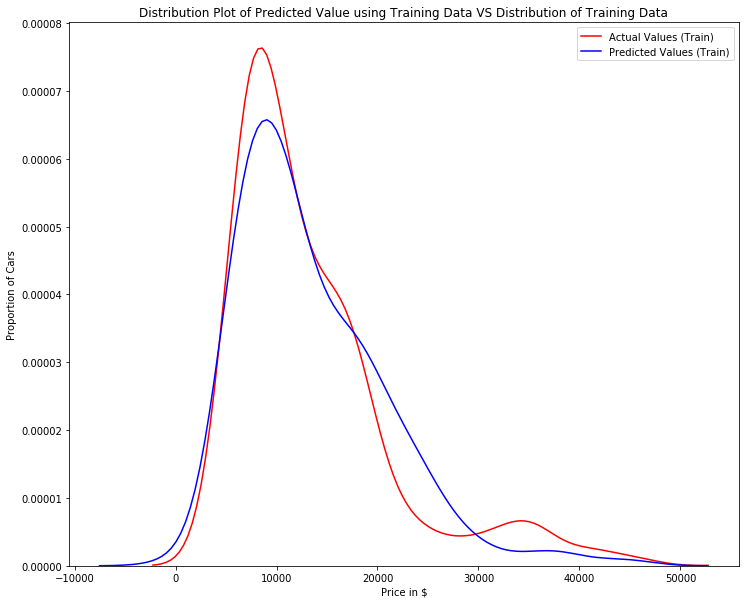

In [36]:
#  examine the distribution of the predicted values of training data

Title = "Distribution Plot of Predicted Value using Training Data VS Distribution of Training Data"

DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)


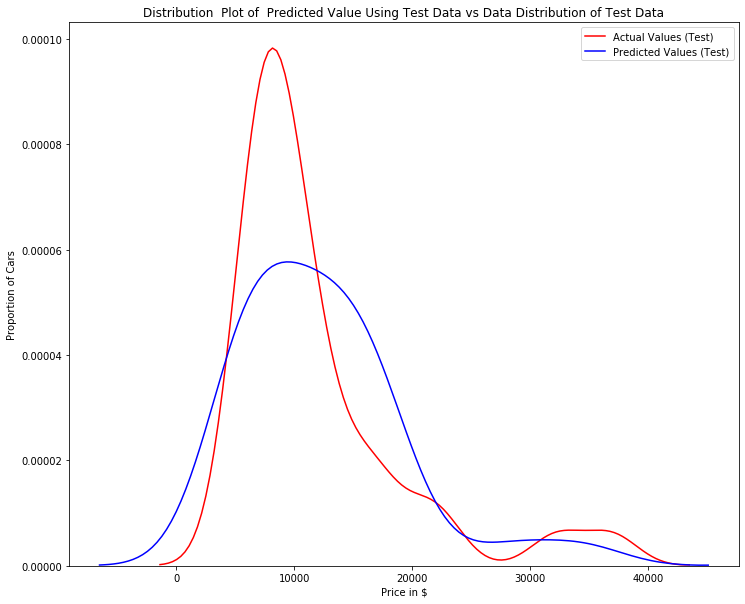

In [38]:
#  when the model encounters new data from the testing data set

#  when the model generates new values from the test data, we see the distribution of the predicted values 
#  is much different from the actual target values. 


Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
#  see if polynomial regression also exhibits a drop in the prediction accuracy when
#  analysing the test dataset

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#  Overfitting

#  occurs when the model fits the noise, not the underlying process.  

#  when testing your model using the test-set, your  model does not perform as well as it is modeling noise,
#  not the underlying process that generated the relationship. 

In [40]:
#  using 55% of the data for testing and 45% for training 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [41]:
#  perform a degree 5 polynomial transformation on the feature "horsepower"

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [42]:
#  create a linear regression model and train it

poly = LinearRegression()

poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#  can see the output of our model using "predict"

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

In [44]:
#  compare the predicted values to the actual targets

print("Predicted values: ", yhat[0:4])
print("True values: ", y_test[0:4].values)

Predicted values:  [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True values:  [ 6295. 10698. 13860. 13499.]


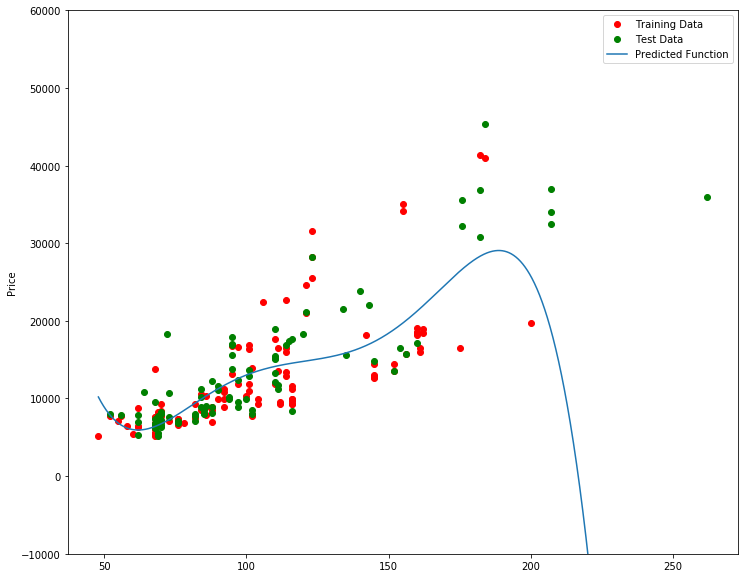

In [49]:
#  use PollyPlot function to display
#  - training data
#  - testing data
#  - and predicted function

PollyPlot(x_train[["horsepower"]], x_test[["horsepower"]], y_train, y_test, poly, pr)

In [ ]:
#  red = training data 
#  green = test data
#  blue = model prediction

# around 200 horsepower, the function begins to diverge from the data points 